In [1]:
%matplotlib inline
from matplotlib.pyplot import *
from numpy import *
from scipy.stats import poisson # carga las funciones asociadas a la distr. de Poisson

Primero cargamos los datos de tiempos de detección desde el archivo `conteo-15-minutos.txt`.

In [2]:
t = genfromtxt('conteo-15-minutos.txt')

Imprimimos el número de datos:

In [3]:
print(len(t))

1792


Ahora graficamos algunos eventos, indicando los tiempos (en segundos) en que se detectaron:

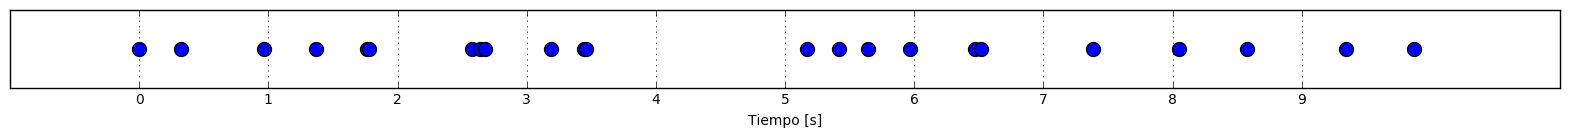

In [4]:
figure(figsize=(20,1))
segundos=10 # cambiar este parámetro para graficar más segundos
mask=t<segundos
scatter(t[mask],0*t[mask], s=100)
xlim(-1,segundos+1)
yticks([])
xticks(range(segundos))
xlabel('Tiempo [s]')
grid()

Ahora definimos las "ventanas" de los valores de los tiempos en que se realizará el conteo:

In [5]:
ventanas=arange(int(t[-1]+2))
print(ventanas)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

Usamos esas ventanas, para contar cuántos eventos se detectaron en cada ventana (es decir, en intervalos de 1 segundo). Para eso, usamos la función `histogram` de Numpy.

In [6]:
histogram(t,bins=ventanas)

(array([ 3,  3,  3,  3,  0,  4,  2,  1,  2,  2,  0,  2,  1,  0,  2,  2,  2,
         1,  5,  3,  3,  1,  1,  0,  0,  6,  3,  1,  0,  2,  3,  0,  1,  4,
         2,  0,  4,  3,  5,  0,  0,  0,  2,  1,  2,  1,  0,  2,  2,  3,  1,
         1,  0,  3,  2,  0,  4,  3,  3,  2,  2,  3,  1,  7,  1,  7,  2,  2,
         2,  1,  1,  0,  2,  2,  1,  1,  0,  0,  0,  0,  1,  1,  2,  1,  2,
         2,  5,  0,  2,  2,  0,  2,  2,  2,  1,  1,  1,  5,  3,  0,  3,  2,
         3,  4,  1,  0,  1,  2,  3,  2,  1,  1,  0,  2,  5,  4,  1,  2,  1,
         0,  3,  2,  2,  6,  2,  3,  1,  0,  0,  2,  5,  3,  2,  0,  1,  3,
         0,  3,  2,  3,  3,  2,  1,  4,  1,  4,  3,  1,  4,  4,  1,  0,  4,
         2,  5,  0,  3,  1,  3,  1,  3,  2,  4,  5,  0,  2,  1,  3,  2,  0,
         2,  1,  0,  1,  1,  4,  1,  2,  2,  1,  2,  2,  3,  3,  2,  1,  2,
         1,  1,  2,  3,  2,  4,  4,  3,  5,  2,  6,  0,  1,  0,  1,  1,  3,
         4,  0,  2,  3,  1,  0,  1,  4,  4,  1,  3,  0,  4,  2,  1,  0,  3,
         0, 

Como vemos `histogram` retorna dos arreglos: uno con el conteo y otro con las ventanas. Aislamos el primer arreglo (componente [0]) y lo asignamos al arreglo nx:

In [7]:
nx = histogram(t,bins=ventanas)[0]

Podemos graficar estos valores en un gráfico de barras:

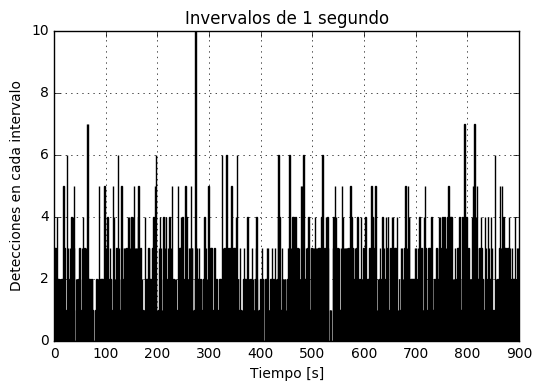

In [8]:
bar(arange(len(nx)),nx)
xlabel('Tiempo [s]')
ylabel('Detecciones en cada intervalo')
title('Invervalos de 1 segundo')
grid()

Con este arreglo, del número de detecciones en cada intervalo de 1 segundo, podemos también calcular el valor medio de detecciones en cada segundo:

In [9]:
mu=mean(nx)
print('Detecciones promedio en cada segundo = '+ str(mu))

Detecciones promedio en cada segundo = 1.99111111111


Análogamente, la desviación estándar del conteo de detecciones por cada intervalo de 1 segundo es:

In [10]:
sigma=std(nx,ddof=1)
print('Desviación estándar de conteo = '+str(sigma))

Desviación estándar de conteo = 1.44299500402


También podemos contar cuántas veces se detectaron 0 partículas en los intervalos de 1 segundo, cuántas veces se detectó 1 partícula, cuántes veces se detectaron 2 partículas, etc. Podemos hacer esto nuevamente usando la función `histogram` de Numpy, pero también podemos usar la función `hist` de Matplotlib, que realiza la misma operación y además construye un gráfico de barras con el conteo:

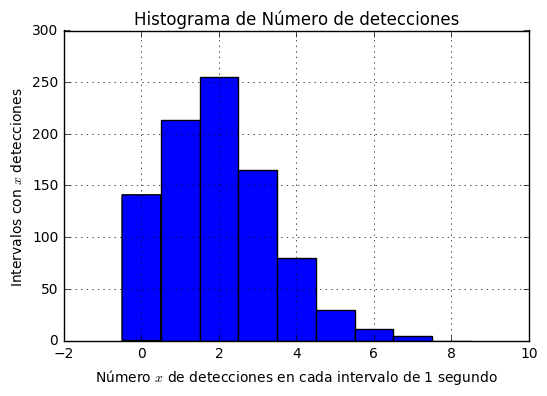

In [11]:
x = range(max(nx))
hist(nx,bins=x, align='left')
grid()
title(u'Histograma de Número de detecciones')
xlabel(u'Número $x$ de detecciones en cada intervalo de 1 segundo')
ylabel(u'Intervalos con $x$ detecciones ')

(Note que `hist` retorna 3 objetos: un arreglo con el conteo, un arreglo con las ventanas usadas, y finalmente el gráfico)

Si agregamos la opción `normed='True'` a `hist`, el gráfico será normalizado, es decir, se dividirá por el número total de conteos:

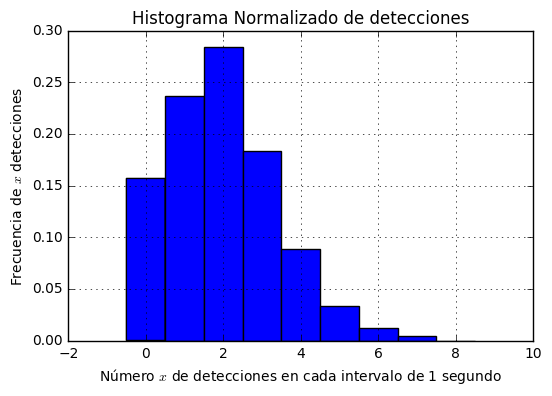

In [12]:
hist(nx,bins=x, align='left',normed='True')
grid()
title(u'Histograma Normalizado de detecciones')
xlabel(u'Número $x$ de detecciones en cada intervalo de 1 segundo')
ylabel(u'Frecuencia de $x$ detecciones ')

Finalmente, comparamos las distribución normalizada de ocurrencias con la distribución idealizada dada por la distribución de Poisson. La función $P(x,\mu)$ está pre-programada en la función `poisson.pmf(x,mu)` de scipy.stats. Elegimos el parámetro $\mu$ de la distribución de Poisson como el valor promedio de detecciones de la muestra, calculado más arriba:

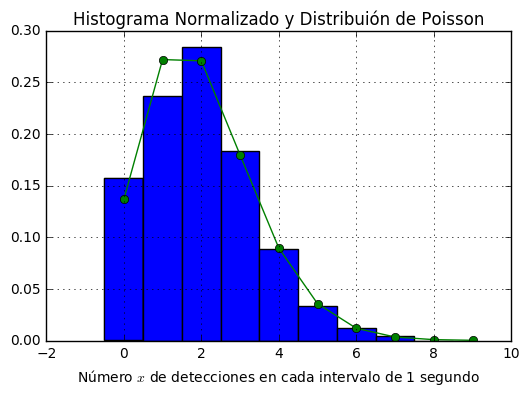

In [13]:
hist(nx,bins=x, align='left',normed='True')
plot(x,poisson.pmf(x,mu), marker='o')
grid()
title(u'Histograma Normalizado y Distribuión de Poisson')
xlabel(u'Número $x$ de detecciones en cada intervalo de 1 segundo')

Como vemos, la distribución de Poisson se ajusta razonablemente bien a los datos. Esperamos que con un mayor número de partículas detectadas (extendiendo las mediciones por más tiempo) mejore el acuerdo del modelo con los datos.